In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\Soft\Desktop\Py\Docs\rice+cammeo+and+osmancik\dataset.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [4]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


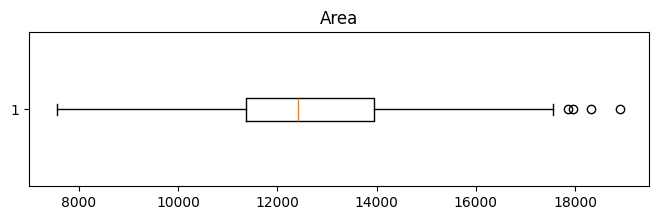

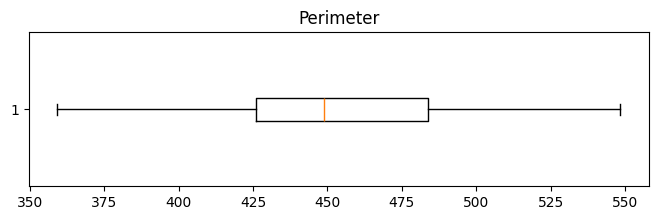

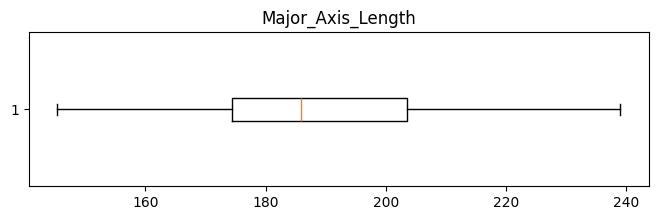

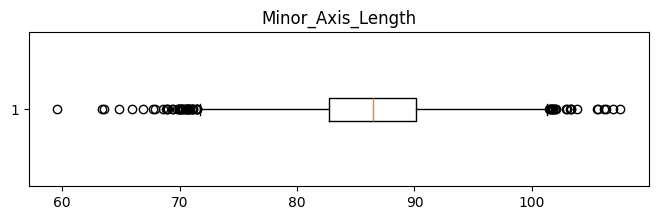

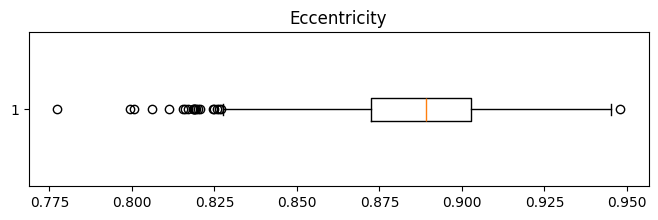

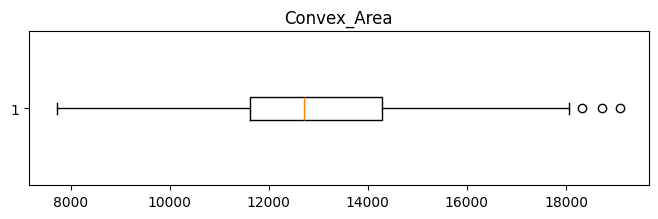

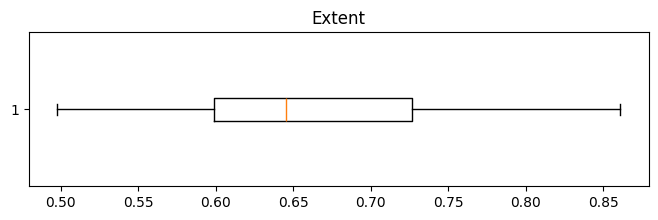

In [7]:
for i in df.columns[:-1]:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[i], vert=False)
    plt.title(i)
    plt.show()

In [8]:
def outliers(d, c):
    q1 = d[c].quantile(0.25)
    q3 = d[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    return d[(d[c]<lower)|(d[c]>upper)]

In [16]:
minor_axis_length_out = outliers(df, "Minor_Axis_Length")

In [15]:
outliers(df, "Eccentricity")

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
1217,13352,514.487000,232.480209,73.986763,0.948007,13585,0.592816,Cammeo
1644,11455,405.618988,159.570267,92.329964,0.815600,11639,0.776189,Osmancik
1657,12725,441.679993,170.232758,97.739029,0.818751,13081,0.641219,Osmancik
1691,11465,410.515015,160.706329,92.144325,0.819296,11706,0.757566,Osmancik
1987,11718,427.145996,164.748199,93.129753,0.824895,12155,0.720310,Osmancik
2183,11271,404.463989,158.988831,91.340584,0.818498,11462,0.670095,Osmancik
2215,10884,406.718994,156.777130,89.608124,0.820558,11233,0.723670,Osmancik
2474,13117,451.868011,173.720901,98.306221,0.824484,13453,0.655621,Osmancik
2491,12714,434.118011,169.255219,96.891304,0.819935,12993,0.741947,Osmancik
2666,11449,411.299988,156.925491,94.257431,0.799511,11696,0.724254,Osmancik


In [18]:
minor_axis_length_out["Minor_Axis_Length"].index

Index([  70,  277,  297,  309,  342,  360,  396,  540,  600,  630,  772,  774,
       1073, 1177, 1181, 1188, 1191, 1203, 1224, 1231, 1251, 1354, 1579, 1591,
       1615, 1714, 1765, 1824, 1844, 1863, 1883, 1971, 1998, 2043, 2205, 2260,
       2288, 2349, 2369, 2379, 2502, 2517, 2525, 2616, 2745, 2770, 2949, 2957,
       3025, 3027, 3037, 3048, 3072, 3077, 3089, 3179, 3231, 3240, 3311, 3539,
       3543, 3558, 3584, 3674, 3735],
      dtype='int64')

In [23]:
df["Minor_Axis_Length"].mean()

86.31375037165762

In [30]:
new_minor = [86.31375 if i in minor_axis_length_out.values else i for i in df["Minor_Axis_Length"]]

In [32]:
df["Minor_Axis_Length"] = new_minor

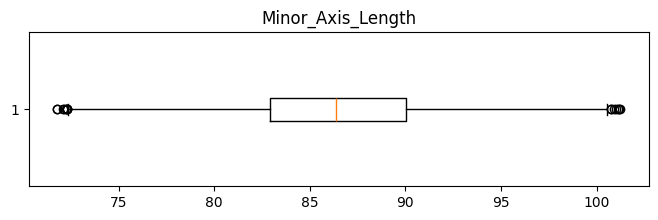

In [36]:
plt.figure(figsize=(8, 2))
plt.boxplot(df["Minor_Axis_Length"], vert=False)
plt.title("Minor_Axis_Length")
plt.show()

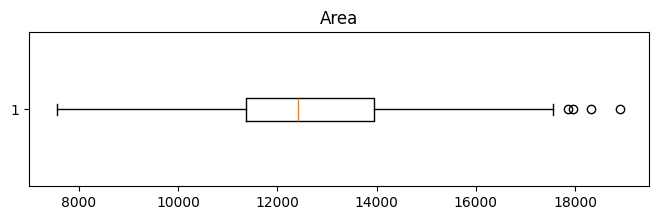

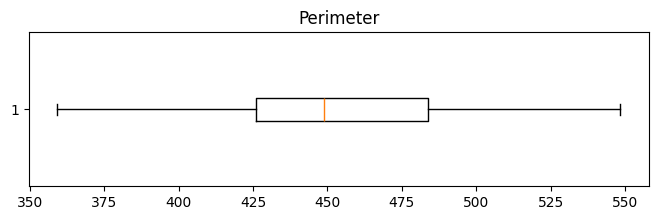

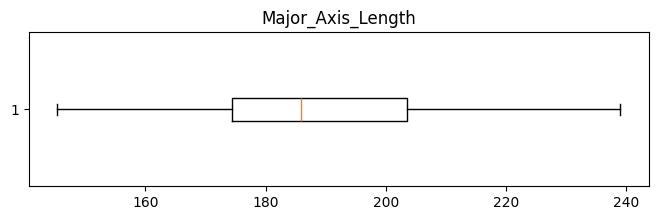

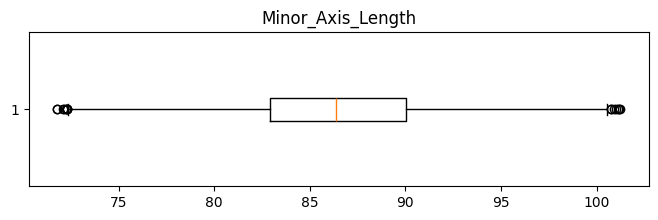

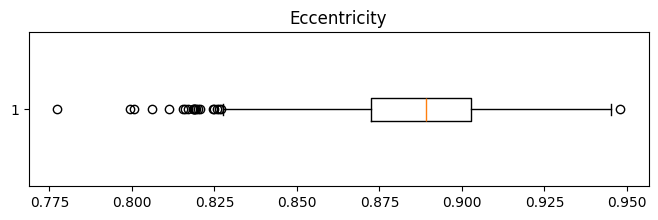

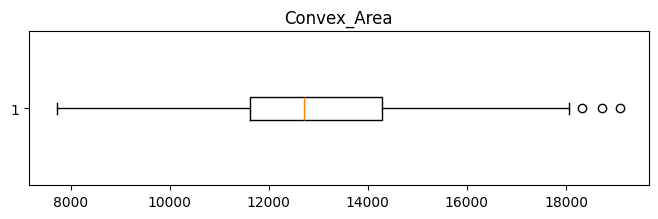

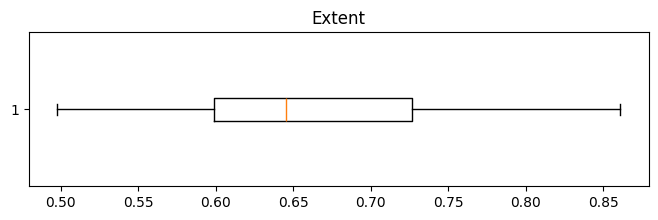

In [38]:
for i in df.columns[:-1]:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[i], vert=False)
    plt.title(i)
    plt.show()

In [40]:
new_df = df.copy()

In [41]:
new_df["Class"].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

In [42]:
new_df["Class"] = new_df["Class"].map({"Osmancik":0, "Cammeo":1})

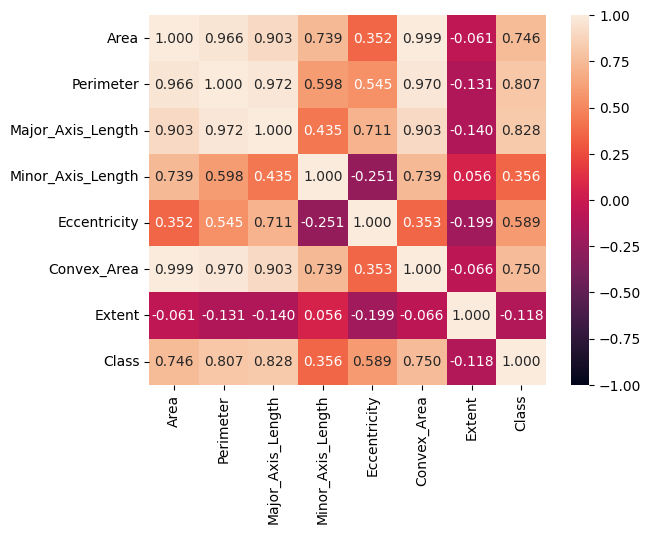

In [44]:
sns.heatmap(new_df.corr(), annot=True, fmt=".3f", vmax=1, vmin=-1)
plt.show()

In [45]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [46]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=452)

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(X_tr)

StandardScaler()

In [49]:
scaled_train = scaler.transform(X_tr)

In [50]:
scaled_test = scaler.transform(X_te)

In [51]:
model = DecisionTreeClassifier()

In [52]:
model.fit(scaled_train, y_tr)

DecisionTreeClassifier()

In [53]:
model.score(scaled_train, y_tr)

1.0

In [54]:
y_pr = model.predict(scaled_test)

In [55]:
accuracy_score(y_te, y_pr)

0.8625393494228751

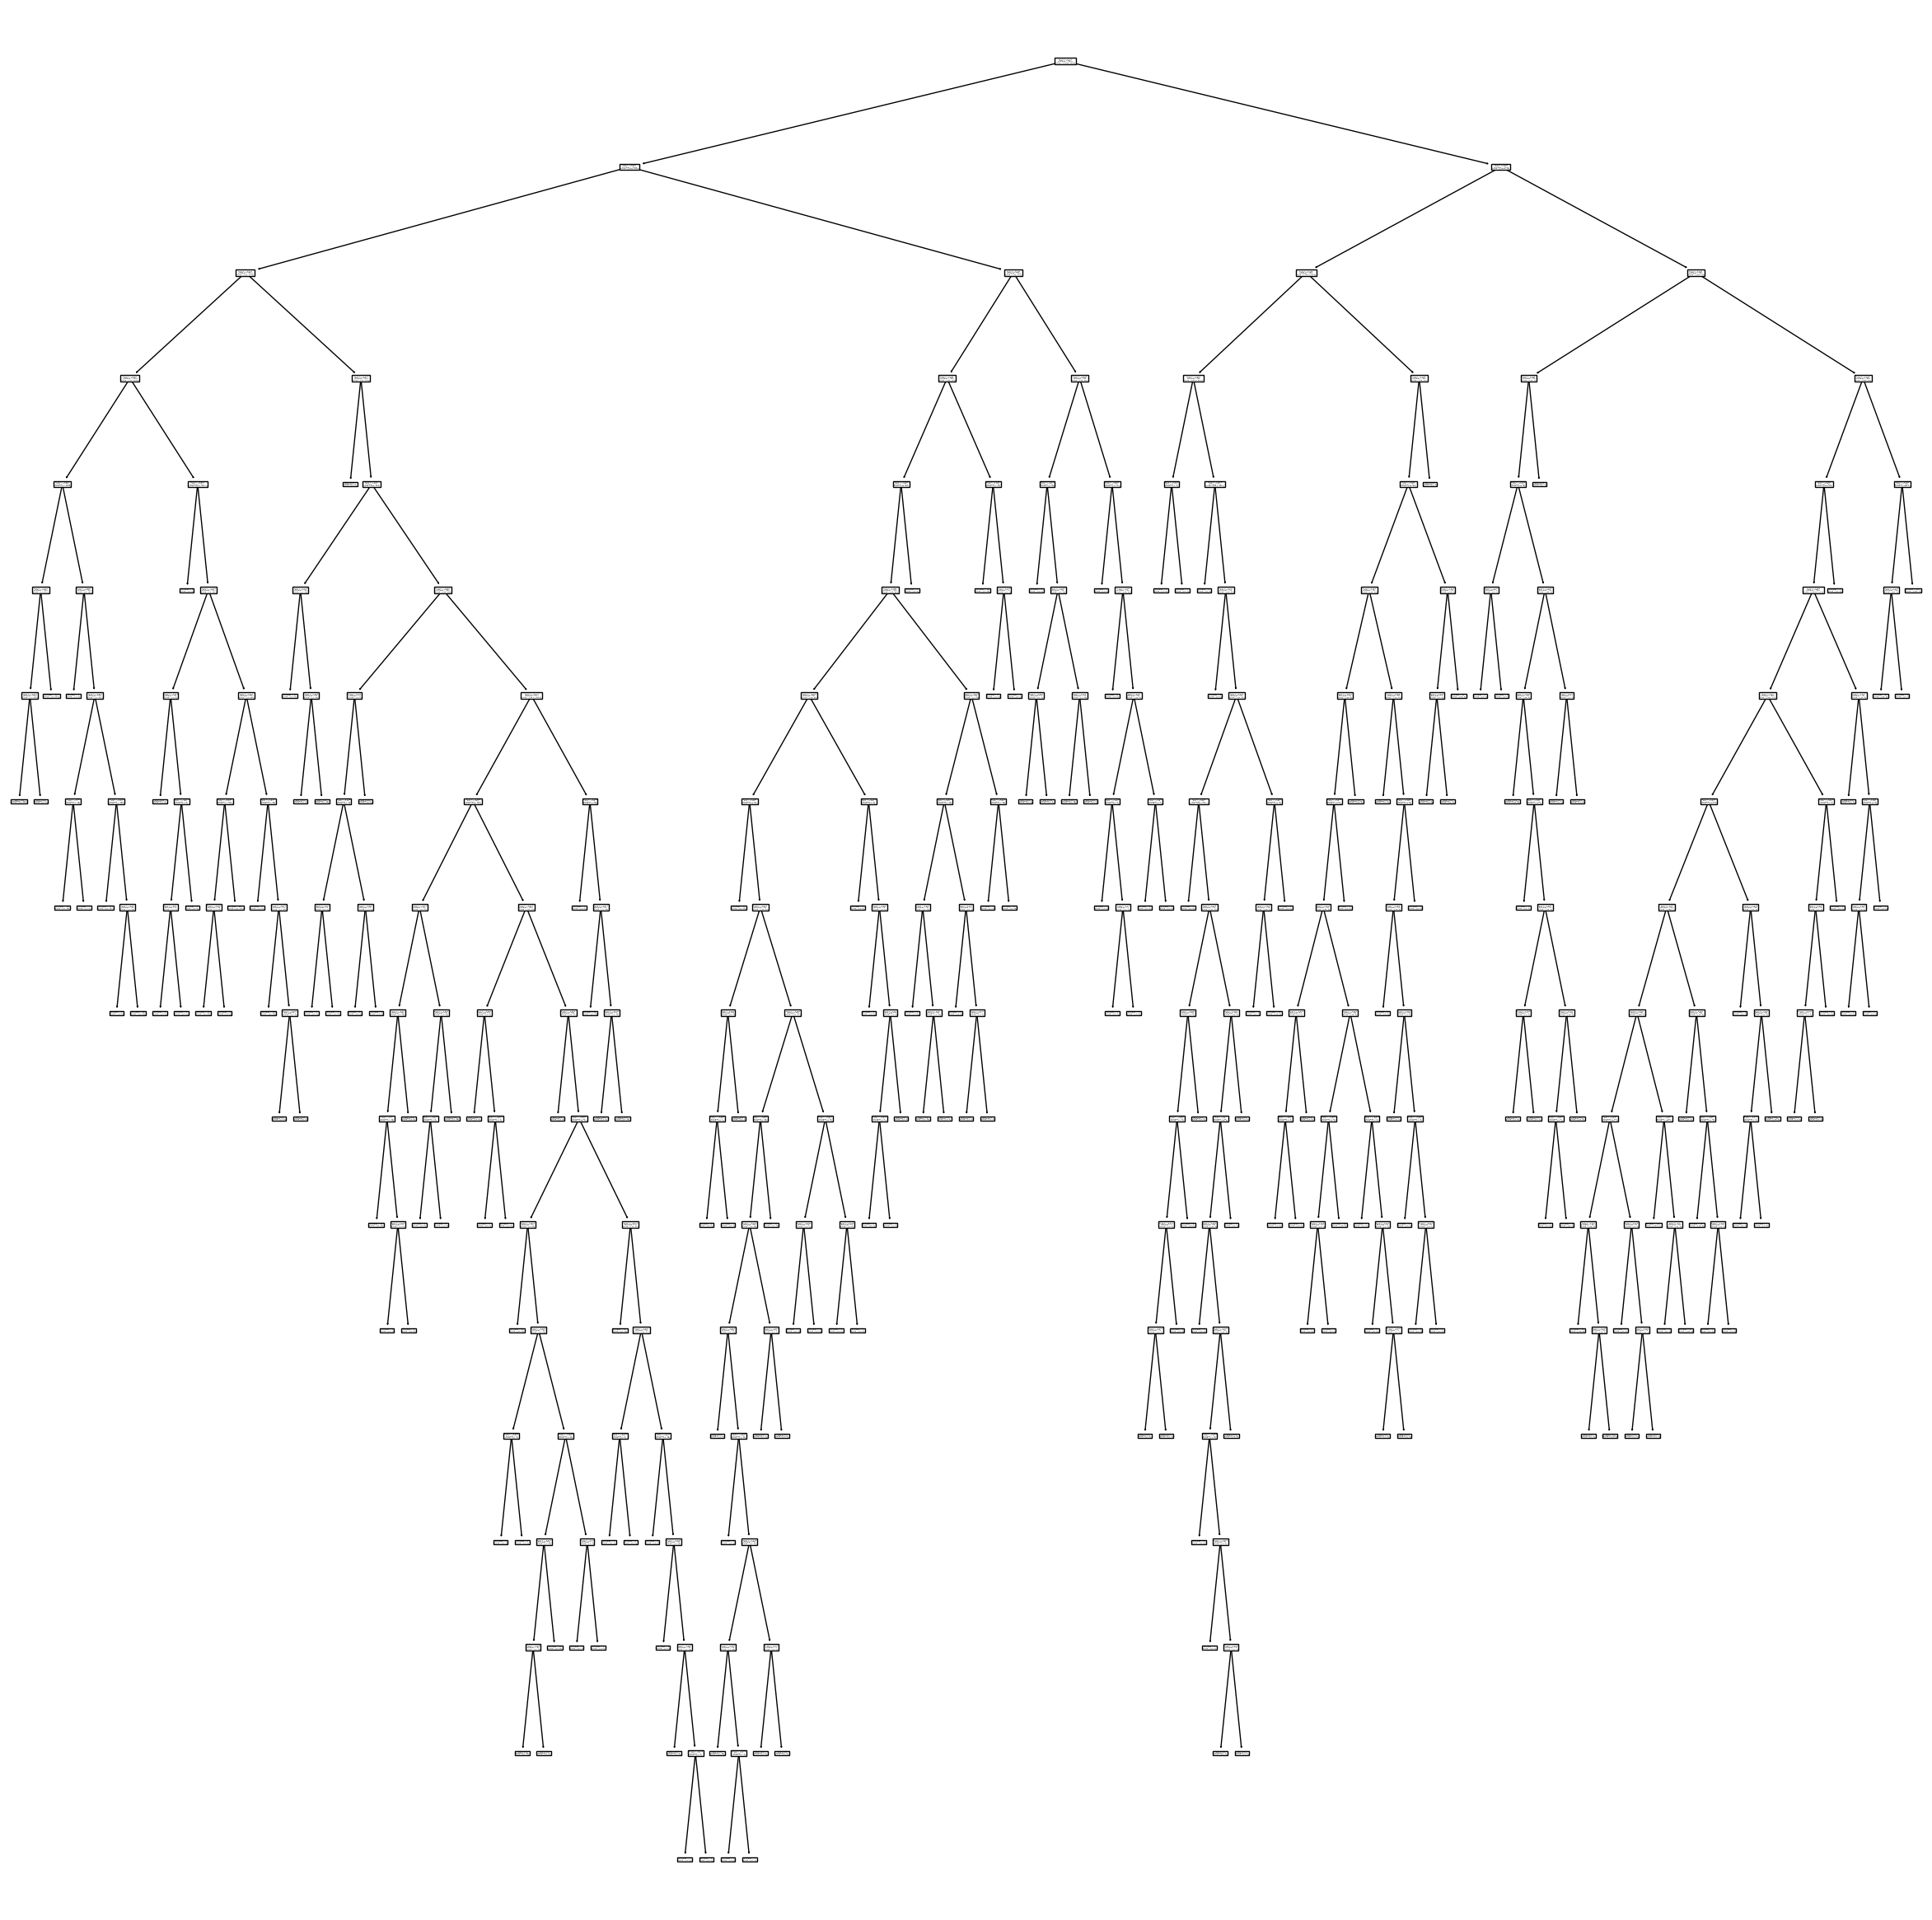

In [58]:
plt.figure(figsize=(30, 30))
plot_tree(model)
plt.show()

In [59]:
model2 = DecisionTreeClassifier(max_depth=8)

In [60]:
model2.fit(scaled_train, y_tr)

DecisionTreeClassifier(max_depth=8)

In [61]:
training_acc = model2.score(scaled_train, y_tr)
testing_acc = accuracy_score(y_te, model2.predict(scaled_test))

training_acc, testing_acc

(0.9632481624081204, 0.8982161594963274)

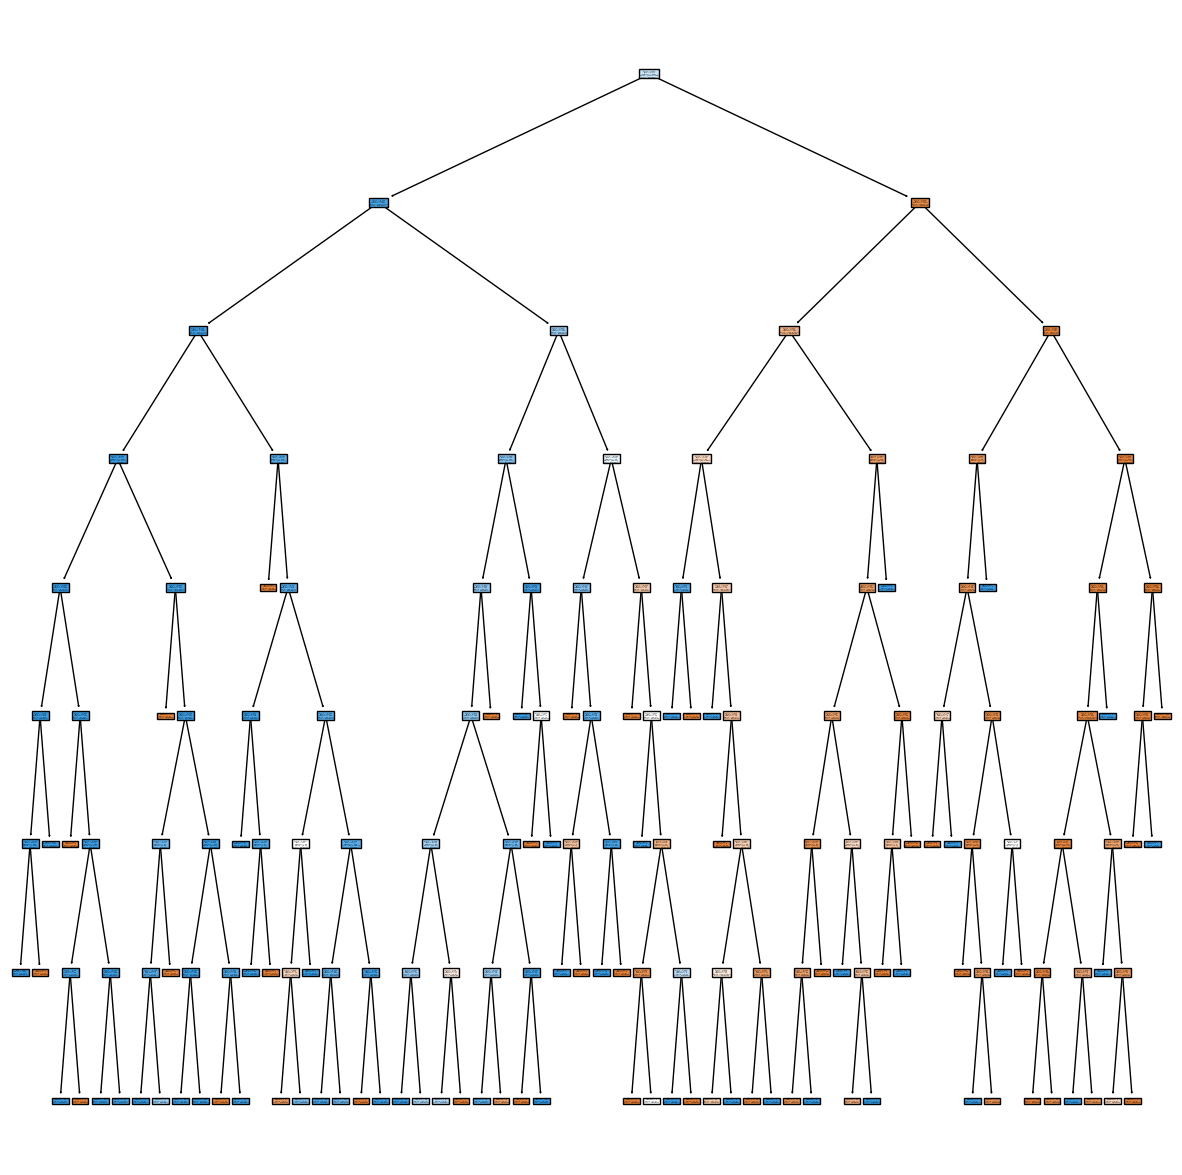

In [64]:
plt.figure(figsize=(15, 15))
plot_tree(model2, filled=True, class_names=df["Class"].unique())
plt.show()

In [68]:
model3 = DecisionTreeClassifier(max_depth=4, max_features=5)

In [69]:
model3.fit(scaled_train, y_tr)

DecisionTreeClassifier(max_depth=4, max_features=5)

In [70]:
training_acc = model3.score(scaled_train, y_tr)
testing_acc = accuracy_score(y_te, model3.predict(scaled_test))

training_acc, testing_acc

(0.9369968498424921, 0.9160545645330536)

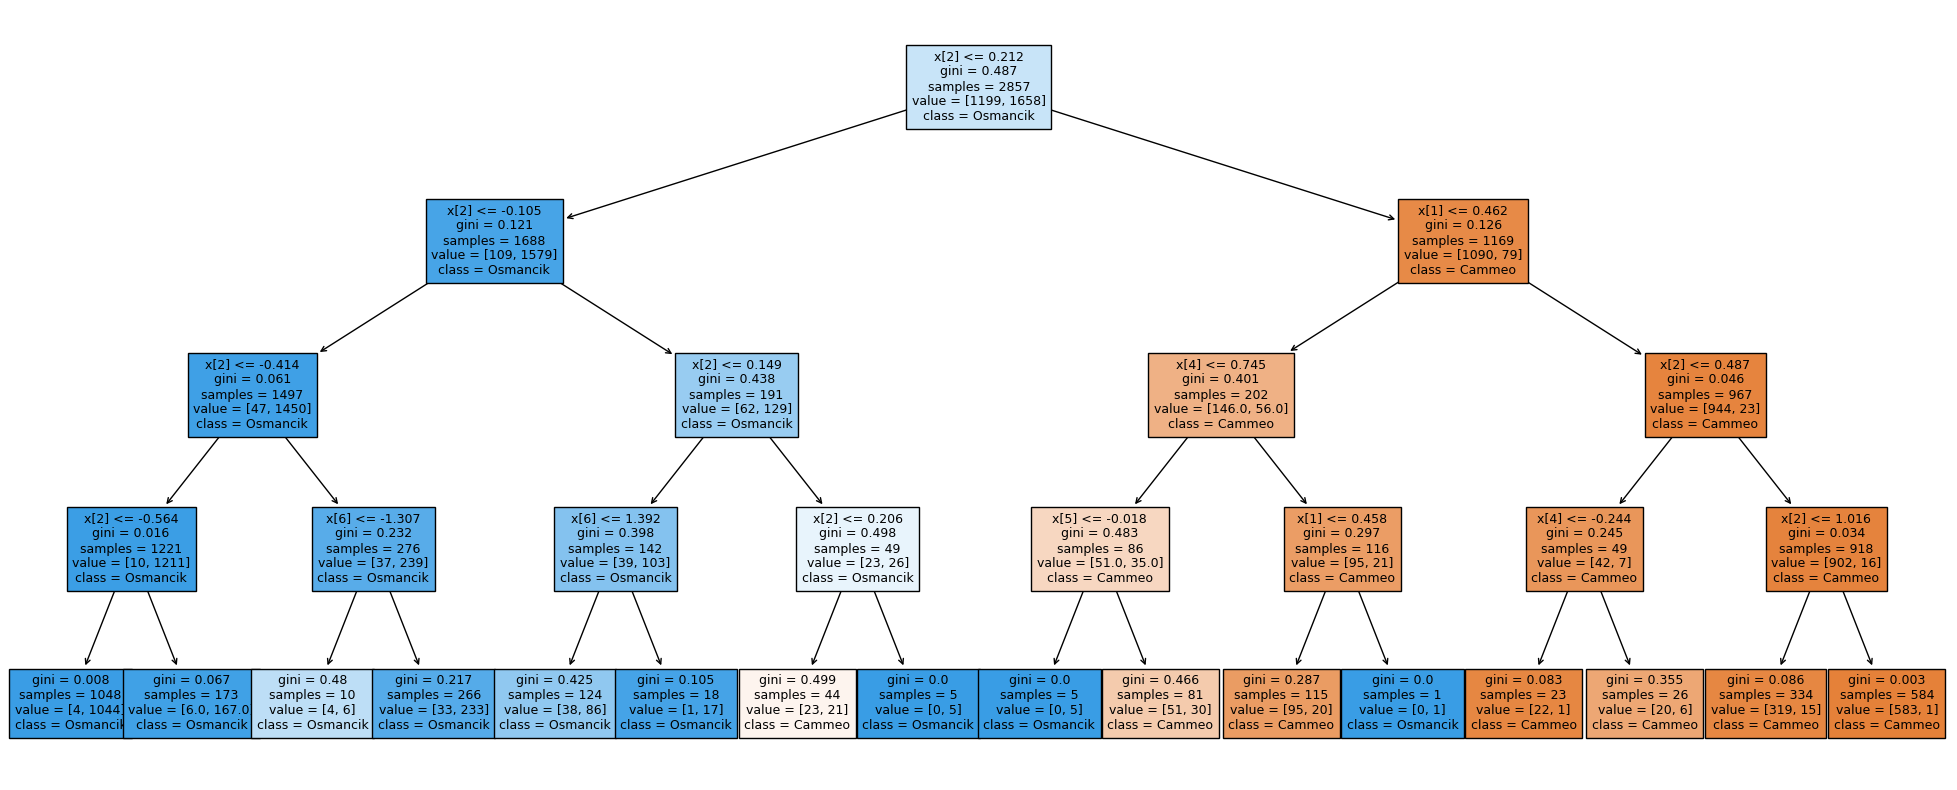

In [89]:
plt.figure(figsize=(25, 10))
plot_tree(model3, filled=True, class_names=df["Class"].unique(), fontsize=9)
plt.show()

In [74]:
y_pr3 = model3.predict(scaled_test)

In [75]:
print(classification_report(y_te, y_pr3))

              precision    recall  f1-score   support

      Cammeo       0.90      0.91      0.91       431
    Osmancik       0.93      0.92      0.92       522

    accuracy                           0.92       953
   macro avg       0.91      0.92      0.92       953
weighted avg       0.92      0.92      0.92       953



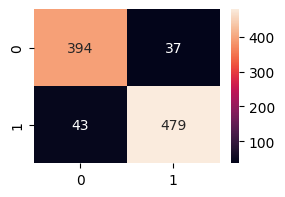

In [79]:
plt.figure(figsize=(3, 2))
sns.heatmap(confusion_matrix(y_te, y_pr3), annot=True, fmt="d")
plt.show()